In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
temps = np.array([280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 
                  290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 
                  300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 
                  310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324,325])


temps2 = np.array([281, 284, 285, 286, 287, 288, 289, 
                  290, 292, 293, 295, 298, 299, 
                  300, 301, 302, 304, 305, 306, 308, 309, 
                  310, 311, 312, 314, 316, 318, 319, 320, 322, 323, 324,325])

In [34]:
C_Ts_pyrads_100plevs = xr.DataArray(np.zeros(len(temps)), dims=['Ts'], coords={'Ts': temps})
C_Ts_pyrads_100_logplevs = xr.DataArray(np.zeros(len(temps)-1), dims=['Ts'], coords={'Ts': temps[:-1]})
C_Ts_pyrads_300_logplevs = xr.DataArray(np.zeros(len(temps)-1), dims=['Ts'], coords={'Ts': temps[:-1]})

In [35]:
for temp in temps:
    
    arr = np.load(f"co2_{temp}K_100plevs.npy")
    C_Ts_pyrads_100plevs.loc[dict(Ts=temp)]=arr[0]
    
for temp in temps[:-1]:
    arr = np.load(f"co2_{temp}K_100_logplevs.npy")
    C_Ts_pyrads_100_logplevs.loc[dict(Ts=temp)]=arr[0]
    
    
for temp in temps[:-1]:
    arr = np.load(f"co2_{temp}K_300_logplevs.npy")
    C_Ts_pyrads_300_logplevs.loc[dict(Ts=temp)]=arr[0]

C_Ts_pyrads_100_logplevs

<xarray.DataArray (Ts: 45)>
array([7.89923323e+00, 1.55474415e+01, 2.45145862e+01, 3.74304906e+01,
       6.63691211e+01, 9.63544880e+01, 1.34775440e+02, 2.10980878e+02,
       2.80202231e+02, 3.60734877e+02, 5.18586347e+02, 6.47719410e+02,
       7.89407685e+02, 1.07772637e+03, 1.28033850e+03, 1.68199516e+03,
       1.94733479e+03, 2.47116886e+03, 2.78814360e+03, 3.43352537e+03,
       3.77592111e+03, 4.54132887e+03, 4.88943548e+03, 5.77534282e+03,
       6.70760375e+03, 7.09998362e+03, 8.16914004e+03, 9.29911453e+03,
       9.68971670e+03, 1.09836985e+04, 1.23655183e+04, 1.38309247e+04,
       1.54021075e+04, 1.70817163e+04, 1.88744612e+04, 2.07812538e+04,
       2.27977355e+04, 2.49127141e+04, 2.71061433e+04, 2.93465982e+04,
       3.16010925e+04, 3.58418620e+04, 3.82146683e+04, 4.04619285e+04,
       4.48763760e+04])
Coordinates:
  * Ts       (Ts) int64 280 281 282 283 284 285 286 ... 319 320 321 322 323 324

In [20]:
Ts_C_pyrads_100plevs = xr.DataArray(temps, dims=['CO2'], 
                           coords={'CO2':xr.DataArray(C_Ts_pyrads_100plevs.values, dims=['CO2'], attrs={'units':'ppmv'})},
                           attrs={'standard_name': 'Ts', 'units': 'K'})

In [21]:
Ts_C_pyrads_100_logplevs = xr.DataArray(temps[:-1], dims=['CO2'], 
                           coords={'CO2':xr.DataArray(C_Ts_pyrads_100_logplevs.values, dims=['CO2'], attrs={'units':'ppmv'})},
                           attrs={'standard_name': 'Ts', 'units': 'K'})

In [39]:
Ts_C_pyrads_300_logplevs = xr.DataArray(temps[:-1], dims=['CO2'], 
                           coords={'CO2':xr.DataArray(C_Ts_pyrads_300_logplevs.values, dims=['CO2'], attrs={'units':'ppmv'})},
                           attrs={'standard_name': 'Ts', 'units': 'K'})

Text(0.5, 1.0, 'C-T$_{s}$ curve: PyRADS')

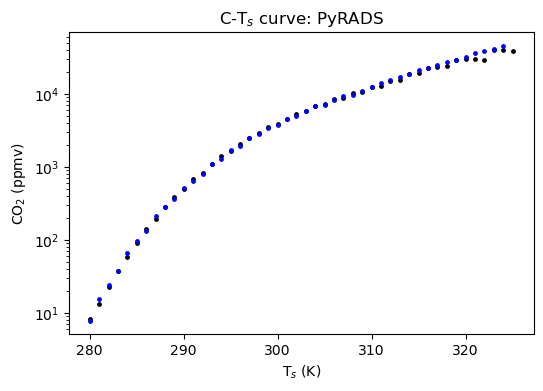

In [22]:
fig, ax = plt.subplots(dpi=100)
        
ax.scatter(C_Ts_pyrads_100plevs.Ts, C_Ts_pyrads_100plevs, color='k', s=6)

ax.scatter(C_Ts_pyrads_100_logplevs.Ts, C_Ts_pyrads_100_logplevs, color='blue', s=6)
    
ax.set_yscale('log')

ax.set_ylabel("CO$_{2}$ (ppmv)")

ax.set_xlabel("T$_{s}$ (K)")

ax.set_title("C-T$_{s}$ curve: PyRADS")

In [40]:
da_ECS_pyrads = C_Ts_pyrads_300_logplevs.copy()
da_ECS_pyrads.attrs = {'standard_name':'ECS', 'units': 'K'}

In [41]:
for temp in da_ECS_pyrads.Ts:
    conc = C_Ts_pyrads_300_logplevs.sel(Ts=temp)
    da_ECS_pyrads.loc[dict(Ts=temp)] = Ts_C_pyrads_300_logplevs.interp(CO2=2*conc) - Ts_C_pyrads_300_logplevs.sel(CO2=conc) 

Text(0.5, 1.0, 'inferred ECS curve')

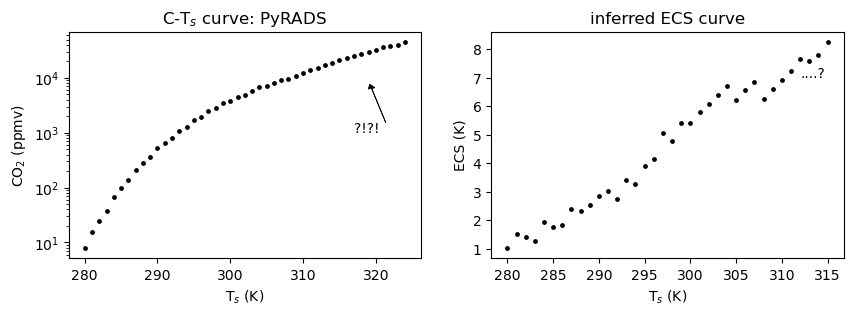

In [25]:
fig, ax = plt.subplots(ncols=2, dpi=100, figsize=(10,3))
        
ax[0].scatter(C_Ts_pyrads_100_logplevs.Ts, C_Ts_pyrads_100_logplevs, color='k', s=6)

ax[0].set_yscale('log')

ax[0].set_ylabel("CO$_{2}$ (ppmv)")

ax[0].set_xlabel("T$_{s}$ (K)")

ax[0].set_title("C-T$_{s}$ curve: PyRADS")

ax[0].text(x=317, y=1e3, s='?!?!')
ax[0].arrow(0.9, 0.6, -0.04, 0.15, 
            head_width=0.02, head_length=0.02, 
            fc='k', ec='k', lw=0.5, transform=ax[0].transAxes)
    
    
    
ax[1].scatter(da_ECS_pyrads.Ts, da_ECS_pyrads, color='k', s=6)
ax[1].text(x=312, y=7, s='....?')
ax[1].set_ylabel("ECS (K)")

ax[1].set_xlabel("T$_{s}$ (K)")

ax[1].set_title("inferred ECS curve")

#plt.savefig("pyrads_being_weird_v2.png", dpi=200, facecolor='white', bbox_inches='tight')

In [57]:
C_Ts_RFM

<xarray.DataArray (Ts: 46)>
array([8.57182000e+00, 1.39098700e+01, 2.23190600e+01, 3.55074400e+01,
       5.58460700e+01, 8.64093900e+01, 1.30952910e+02, 1.93910040e+02,
       2.80000000e+02, 3.95393240e+02, 5.46167960e+02, 7.38251340e+02,
       9.79185340e+02, 1.27433216e+03, 1.62920706e+03, 2.04819763e+03,
       2.53485794e+03, 3.09218360e+03, 3.72228531e+03, 4.43493839e+03,
       5.22250698e+03, 6.09417727e+03, 7.05494096e+03, 8.11267971e+03,
       9.27869265e+03, 1.05659834e+04, 1.19939544e+04, 1.35833689e+04,
       1.53629322e+04, 1.73658053e+04, 1.96335055e+04, 2.22122014e+04,
       2.51563947e+04, 2.85385641e+04, 3.24304668e+04, 3.69316008e+04,
       4.21469044e+04, 4.81515945e+04, 5.51952377e+04, 6.34130571e+04,
       7.30178220e+04, 8.43288163e+04, 9.74825650e+04, 1.12909957e+05,
       1.31021552e+05, 1.52291214e+05])
Coordinates:
  * Ts       (Ts) int64 280 281 282 283 284 285 286 ... 320 321 322 323 324 325

In [26]:
import pickle

data_path = "../lambdanu_ctrl.pickle"

with open(data_path,mode='rb') as f:
    data = pickle.load(f)

for key,val in data.items():
    exec(key + '=val')

In [27]:
C_Ts_RFM = xr.DataArray(dims=['Ts'], coords={'Ts':np.arange(280,326)})


for t in np.arange(280, 326):
    C_Ts_RFM.loc[dict(Ts=t)] = lambdanu[t]['co2_ppm']


In [28]:
Ts_C_RFM = xr.DataArray(temps, dims=['CO2'], 
                           coords={'CO2':xr.DataArray(C_Ts_RFM.values, dims=['CO2'], attrs={'units':'ppmv'})},
                           attrs={'standard_name': 'Ts', 'units': 'K'})

In [29]:
da_ECS_RFM = C_Ts_RFM.copy()
da_ECS_RFM.attrs = {'standard_name':'ECS', 'units': 'K'}

In [30]:
for temp in da_ECS_RFM.Ts:
    conc = C_Ts_RFM.sel(Ts=temp)
    da_ECS_RFM.loc[dict(Ts=temp)] = Ts_C_RFM.interp(CO2=2*conc) - Ts_C_RFM.sel(CO2=conc) 

Text(0.5, 1.0, 'inferred ECS')

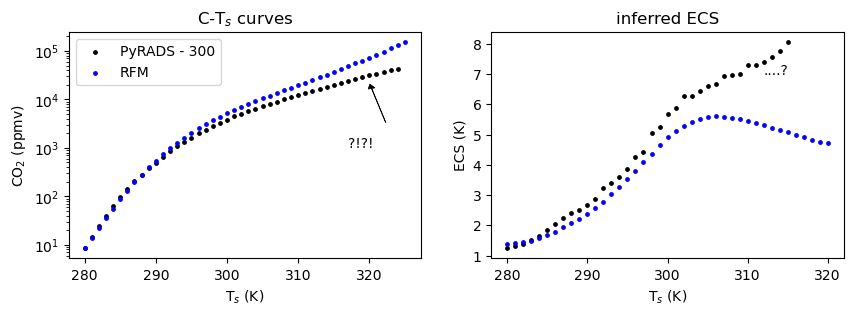

In [42]:
fig, ax = plt.subplots(ncols=2, dpi=100, figsize=(10,3))
        
#ax[0].scatter(C_Ts_pyrads_100_logplevs.Ts, C_Ts_pyrads_100_logplevs, color='k', s=6, label='PyRADS')
ax[0].scatter(C_Ts_pyrads_300_logplevs.Ts, C_Ts_pyrads_300_logplevs, color='k', s=6, label='PyRADS - 300')
ax[0].scatter(C_Ts_RFM.Ts, C_Ts_RFM, color='blue', s=6, label='RFM')
ax[0].legend()
ax[0].set_yscale('log')

ax[0].set_ylabel("CO$_{2}$ (ppmv)")

ax[0].set_xlabel("T$_{s}$ (K)")

ax[0].set_title("C-T$_{s}$ curves")

ax[0].text(x=317, y=1e3, s='?!?!')
ax[0].arrow(0.9, 0.6, -0.04, 0.15, 
            head_width=0.02, head_length=0.02, 
            fc='k', ec='k', lw=0.5, transform=ax[0].transAxes)
    
    
    
ax[1].scatter(da_ECS_pyrads.Ts, da_ECS_pyrads, color='k', s=6)
ax[1].scatter(da_ECS_RFM.Ts, da_ECS_RFM, color='blue', s=6)
ax[1].text(x=312, y=7, s='....?')
ax[1].set_ylabel("ECS (K)")

ax[1].set_xlabel("T$_{s}$ (K)")

ax[1].set_title("inferred ECS")

#plt.savefig("pyrads_being_weird_vs_RFM_v3_100logplevs.png", dpi=200, facecolor='white', bbox_inches='tight')

In [68]:
import climlab

In [75]:
state = climlab.column_state(num_lev=1000, num_lat=1, water_depth=1.)
plevs = state['Tatm'].domain.axes['lev'].points

In [76]:
plevs

array([5.000e-01, 1.500e+00, 2.500e+00, 3.500e+00, 4.500e+00, 5.500e+00,
       6.500e+00, 7.500e+00, 8.500e+00, 9.500e+00, 1.050e+01, 1.150e+01,
       1.250e+01, 1.350e+01, 1.450e+01, 1.550e+01, 1.650e+01, 1.750e+01,
       1.850e+01, 1.950e+01, 2.050e+01, 2.150e+01, 2.250e+01, 2.350e+01,
       2.450e+01, 2.550e+01, 2.650e+01, 2.750e+01, 2.850e+01, 2.950e+01,
       3.050e+01, 3.150e+01, 3.250e+01, 3.350e+01, 3.450e+01, 3.550e+01,
       3.650e+01, 3.750e+01, 3.850e+01, 3.950e+01, 4.050e+01, 4.150e+01,
       4.250e+01, 4.350e+01, 4.450e+01, 4.550e+01, 4.650e+01, 4.750e+01,
       4.850e+01, 4.950e+01, 5.050e+01, 5.150e+01, 5.250e+01, 5.350e+01,
       5.450e+01, 5.550e+01, 5.650e+01, 5.750e+01, 5.850e+01, 5.950e+01,
       6.050e+01, 6.150e+01, 6.250e+01, 6.350e+01, 6.450e+01, 6.550e+01,
       6.650e+01, 6.750e+01, 6.850e+01, 6.950e+01, 7.050e+01, 7.150e+01,
       7.250e+01, 7.350e+01, 7.450e+01, 7.550e+01, 7.650e+01, 7.750e+01,
       7.850e+01, 7.950e+01, 8.050e+01, 8.150e+01, 

280 [9.573053]
281 [15.31263016]
282 [24.08393894]
283 [36.98424288]
284 [55.22105271]
285 [104.96254367]
286 [150.63375492]
287 [208.70266816]
288 [279.5]
289 [363.53647497]
290 [457.4562503]
291 [739.48502606]
292 [916.11625664]
293 [1108.36210705]
294 [1307.03579745]
295 [1500.56624616]
296 [2246.05220972]
297 [2591.47871965]
298 [2923.46481279]
299 [3219.13512759]
300 [3453.19497477]
301 [3601.11505559]
302 [5428.64580211]
303 [5860.17174434]
304 [6205.66206607]
305 [6405.17519614]
306 [6425.91986259]
307 [6242.3709554]
308 [10078.78668024]
309 [10637.45301599]
310 [11003.46865853]
311 [11088.18683302]
312 [10818.60990915]
313 [10166.70520599]
314 [9177.01028617]
315 [18732.63584934]
316 [22219.75468934]
317 [26571.65741774]
318 [31904.01541883]
319 [38248.03015757]
320 [45668.91794662]


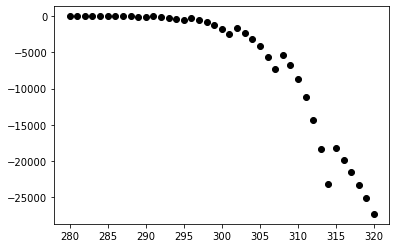

In [10]:
import os

fig, ax = plt.subplots()

for temp in temps:

    arr = np.load(f"co2_{temp}K.npy")
    print(temp, arr)
        
    #ax.scatter(temp, arr, color='k')
    ax.scatter(temp, arr[0]-C_Ts.sel(Ts=temp), color='k')
    
    
#ax.scatter(C_Ts.Ts, C_Ts, color='red')
#ax.set_yscale('log')